**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: **Ariadna Itzel Albarrán Mera**

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [5]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [6]:
happiness=pd.read_csv('/content/gdrive/MyDrive/happiness_report.csv')

3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice.

In [173]:
mexico= happiness[happiness['Country or region'].str.contains('Mexico')]
mexico.set_index("Country or region",inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

In [59]:
value=mexico['Score'].values[0]
value

6.595

In [61]:
props_bbox = {'boxstyle': 'circle',
              'facecolor': 'red',
              'alpha': 0.2}

Text(6.595, 0, 'MEX')

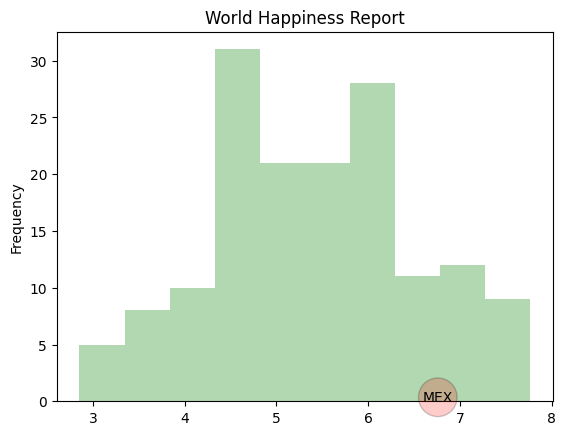

In [72]:
happiness['Score'].plot.hist(color='green',alpha=0.3)
plt.title('World Happiness Report')
plt.text(value,0,'MEX',bbox=props_bbox)

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

In [79]:
value2=mexico['Healthy life expectancy'].values[0]
value2

0.861

In [82]:
props_arrow = {'facecolor':'white',
'width':0.5,
'headwidth':8,
'headlength':8}

In [100]:
props_bbox2 = {'boxstyle': 'circle',
              'facecolor': 'red',
              'alpha': 0.2}

Text(1.2, 0.891, 'MEX')

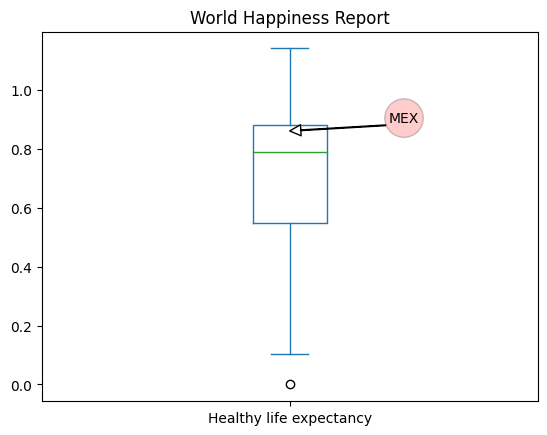

In [101]:
happiness['Healthy life expectancy'].plot.box()
plt.title('World Happiness Report')
plt.annotate('MEX',xy=(1,value2),xytext=(1.2,value2+.03),arrowprops=props_arrow,bbox=props_bbox2)

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

In [143]:
mexico_pie=mexico[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
mexico_pie = mexico_pie.rename(index={22: 'Factors'})
mexico_pie=mexico_pie.T
mexico_pie['Porcentaje']=mexico_pie['Factors']*100/mexico_pie['Factors'].sum()

Text(0.5, 1.0, 'World Happiness Report')

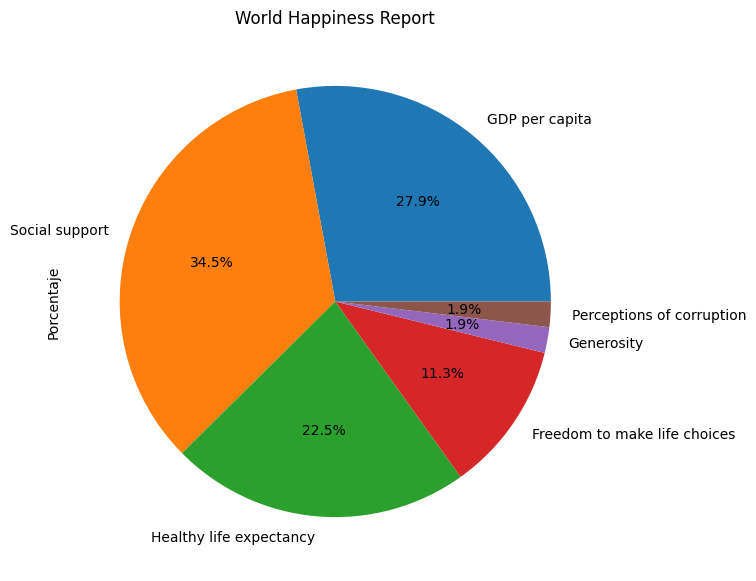

In [153]:
mexico_pie.plot.pie(y='Porcentaje',labels=mexico_pie.index,figsize=(7,7),autopct='%1.1f%%',legend=False)
plt.title('World Happiness Report')

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

<Axes: title={'center': 'World Happiness Report'}, ylabel='Factor'>

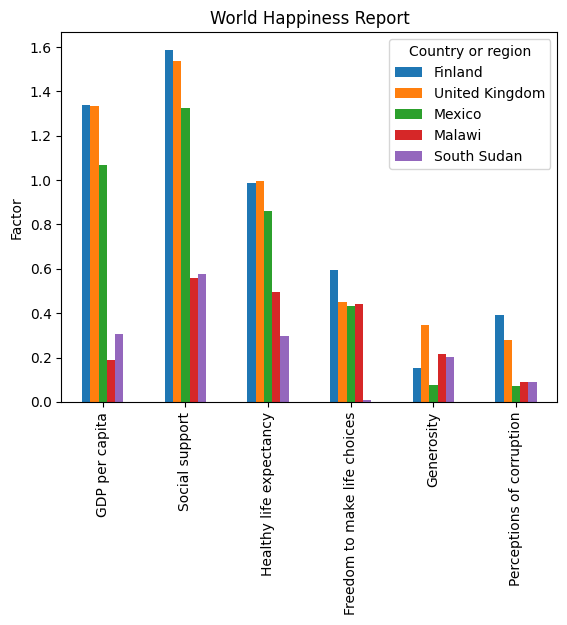

In [221]:
paises5=happiness.loc[(happiness['Score']==happiness['Score'].max())|(happiness['Score']==happiness['Score'].min())|(happiness['Country or region']=='Mexico')|(happiness['Country or region']=='United Kingdom')|(happiness['Country or region']=='Malawi')]
paises5.set_index("Country or region",inplace=True)
paises5=paises5[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
paises5=paises5.T
paises5.plot.bar(title='World Happiness Report',ylabel='Factor')
#paises5

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje
(`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

**y= variable dependiente "Score"**

**x= variable independiente "Factores"**



Text(0.5, 0.98, 'World Happiness Report')

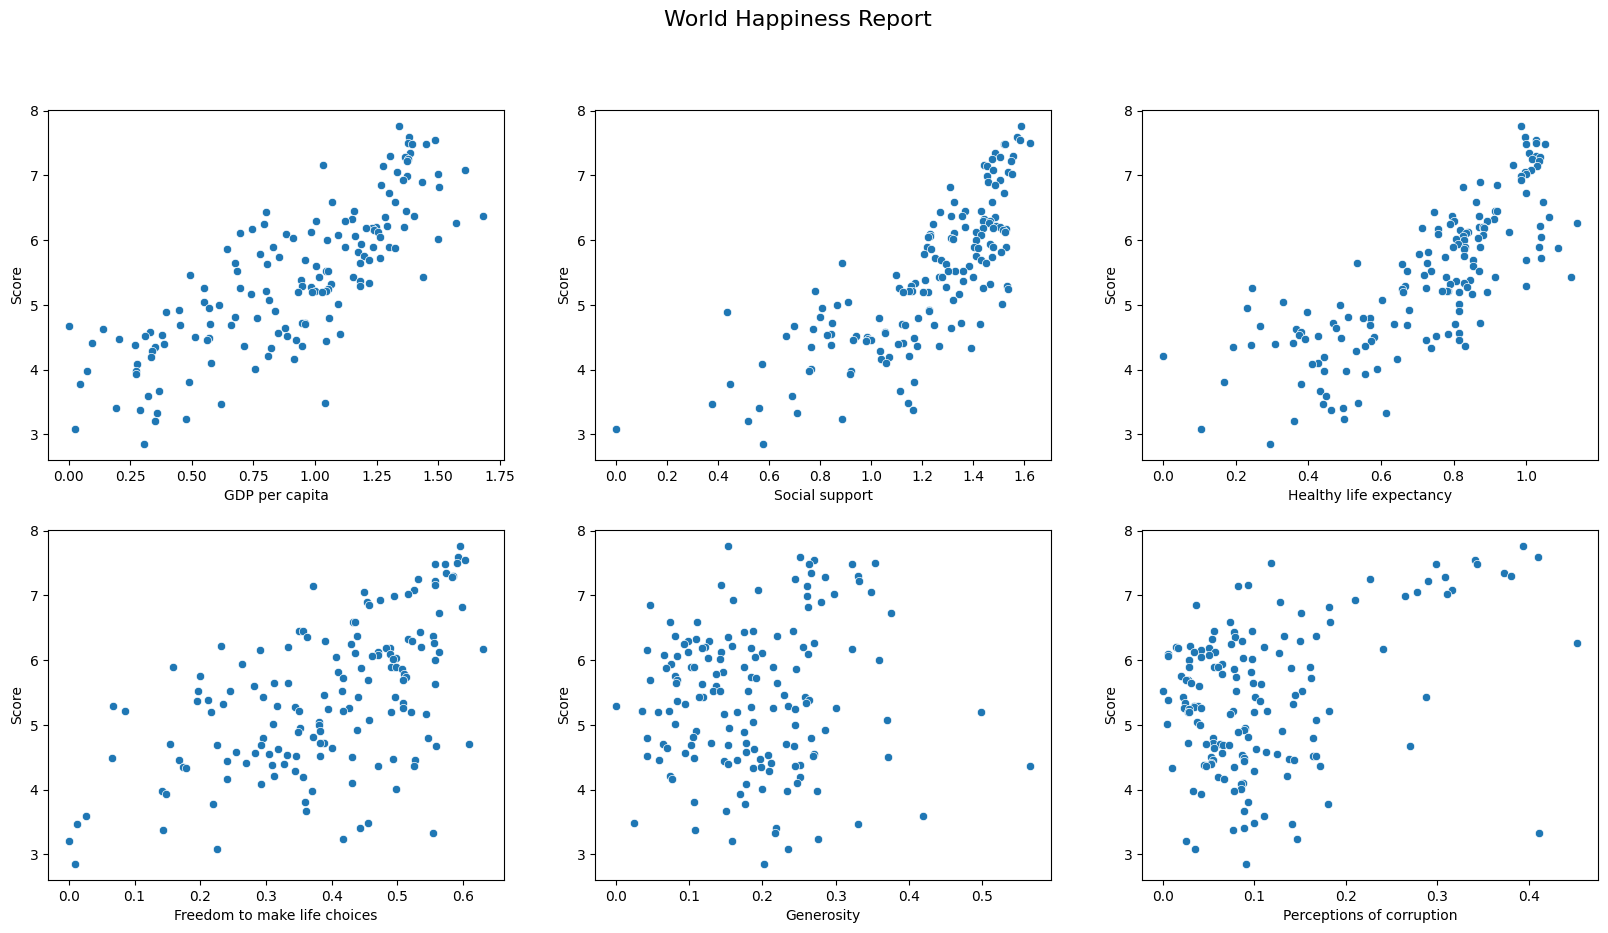

In [223]:
fig,axs = plt.subplots(2,3,figsize=(20,10))
sns.scatterplot(x=happiness['GDP per capita'],y=happiness['Score'],ax=axs[0,0])
sns.scatterplot(x=happiness['Social support'],y=happiness['Score'],ax=axs[0,1])
sns.scatterplot(x=happiness['Healthy life expectancy'],y=happiness['Score'],ax=axs[0,2])
sns.scatterplot(x=happiness['Freedom to make life choices'],y=happiness['Score'],ax=axs[1,0])
sns.scatterplot(x=happiness['Generosity'],y=happiness['Score'],ax=axs[1,1])
sns.scatterplot(x=happiness['Perceptions of corruption'],y=happiness['Score'],ax=axs[1,2])
fig.suptitle('World Happiness Report',fontsize=16)

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<ipython-input-195-6becd67060d9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix=paises_matrix.corr()


<Axes: >

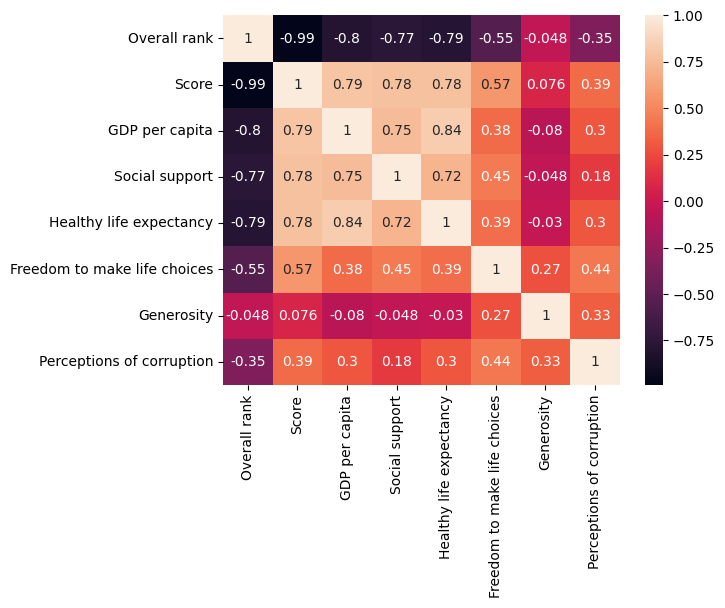

In [195]:
paises_matrix=happiness.copy()
#paises_matrix.set_index("Country or region",inplace=True)
#paises_matrix=happiness_matrix[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
matrix=paises_matrix.corr()
sns.heatmap(matrix,annot=True)

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región.

In [206]:
meta=pd.read_csv('/content/gdrive/MyDrive/Metadata.csv')
meta = meta.rename(columns={'TableName': 'Country or region',})
meta.head()

,Country Code,Region,IncomeGroup,SpecialNotes,Country or region
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [200]:
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [207]:
result=pd.merge(happiness,meta,on="Country or region", how='outer',sort=True)
result

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Region,IncomeGroup,SpecialNotes
0,154.0,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,AFG,South Asia,Low income,NaN
1,107.0,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027,ALB,Europe & Central Asia,Upper middle income,NaN
2,88.0,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,DZA,Middle East & North Africa,Lower middle income,NaN
3,NaN,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASM,East Asia & Pacific,Upper middle income,NaN
4,NaN,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AND,Europe & Central Asia,High income,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,NaN,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WLD,NaN,NaN,World aggregate.
279,151.0,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,NaN,NaN,NaN,NaN
280,NaN,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,YEM,Middle East & North Africa,Low income,NaN
281,138.0,Zambia,4.107,0.578,1.058,0.426,0.431,0.247,0.087,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...


Text(0.5, 1.0, 'World Happiness Report')

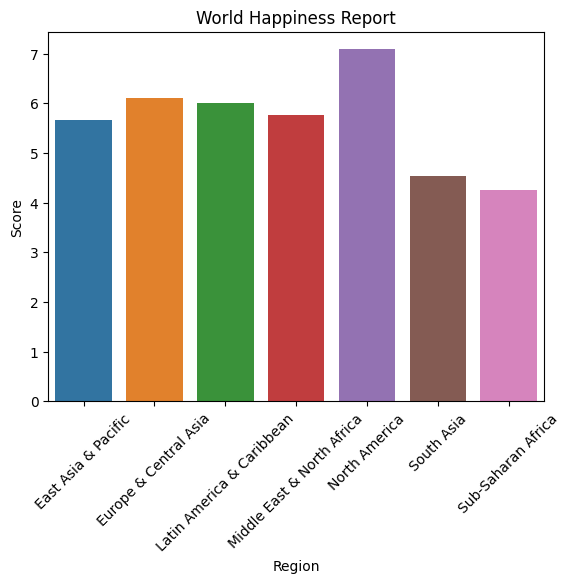

In [220]:
sns.barplot(x=region.index,y='Score',data=region)
plt.xticks(rotation=45)
plt.title('World Happiness Report')